In [6]:
import os
from deepface import DeepFace
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import random

# from matplotlib.pyplot

In [18]:
def detect_faces_in_directory(directory_path):
    """
    Detect faces in images within the given directory and return their bounding boxes.
    
    Parameters:
    - directory_path: String representing the path to the directory containing images.
    
    Returns:
    - bounding_boxes_list: List of tuples, where each tuple contains the image path and a list of bounding boxes detected in that image.
      Bounding boxes are represented as tuples (x, y, width, height).
    """
    # Supported image file extensions
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    # Initialize the list to store bounding boxes
    bounding_boxes_list = []

    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(image_extensions):
            image_path = os.path.join(directory_path, filename)
            try:
                # Detect faces in the image using RetinaFace
                faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface')
                
                # Initialize the list to store bounding boxes for the current image
                image_bounding_boxes = []

                # Check if any faces are detected
                if len(faces) > 0:
                    print(f"Faces detected in: {image_path}")
                    for face in faces:
                        # Extract bounding box coordinates
                        x, y, w, h = face["facial_area"]["x"], face["facial_area"]["y"], face["facial_area"]["w"], face["facial_area"]["h"]
                        image_bounding_boxes.append((x, y, w, h))
                    
                    # Append the bounding boxes to the main list
                    bounding_boxes_list.append((image_path, image_bounding_boxes))
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    return bounding_boxes_list

def draw_face_bounding_boxes(bounding_boxes, canvas_size=(800, 800), box_colors=None, box_width=2, output_image_path="output_image.png"):
    """
    Draw face bounding boxes on a clear canvas and save the result as an image.
    
    Parameters:
    - bounding_boxes: List of tuples, where each tuple contains the image path and a list of bounding boxes (x, y, width, height).
    - canvas_size: Tuple representing the size of the canvas (width, height).
    - box_colors: List of tuples representing the colors of the bounding boxes (R, G, B). If None, random colors will be used.
    - box_width: Integer representing the width of the bounding box lines.
    - output_image_path: String representing the path where the output image will be saved.
    """
    
    # Create a blank black canvas
    canvas = Image.new('RGB', canvas_size, 'black')
    draw = ImageDraw.Draw(canvas)
    
    canvas_width, canvas_height = canvas_size

    # Define a list of default colors if no colors are provided
    if box_colors is None:
        box_colors = ['cyan', 'yellow', 'lime', 'fuchsia', 'magenta']

    for image_idx, image in enumerate(bounding_boxes):
        for box_idx, box in enumerate(image[1]):
            x, y, width, height = box

            # Calculate scale factor to maximize the bounding box size while maintaining aspect ratio
            scale_factor = min(canvas_width / width, canvas_height / height) * 0.9
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)

            # Calculate the center position for each bounding box
            center_x = (canvas_width - new_width) // 2
            center_y = (canvas_height - new_height) // 2

            # Define the top left and bottom right points of the bounding box
            top_left = (center_x, center_y)
            bottom_right = (center_x + new_width, center_y + new_height)

            # Choose color from the list (cycling through the list if there are more boxes than colors)
            color = box_colors[(image_idx + box_idx) % len(box_colors)]

            # Draw the bounding box
            draw.rectangle([top_left, bottom_right], outline=color, width=box_width)
        
    # Save the image
    canvas.save(output_image_path)
    return canvas



In [28]:
# Example usage:
directory_path = "/tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/"
bounding_boxes = detect_faces_in_directory(directory_path)

Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/1.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/10.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/100.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/101.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/102.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/103.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/104.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/105.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/106.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/107.jpg
Faces detected in: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/108.jpg
Faces detected in: /tf/data/face_videos/source

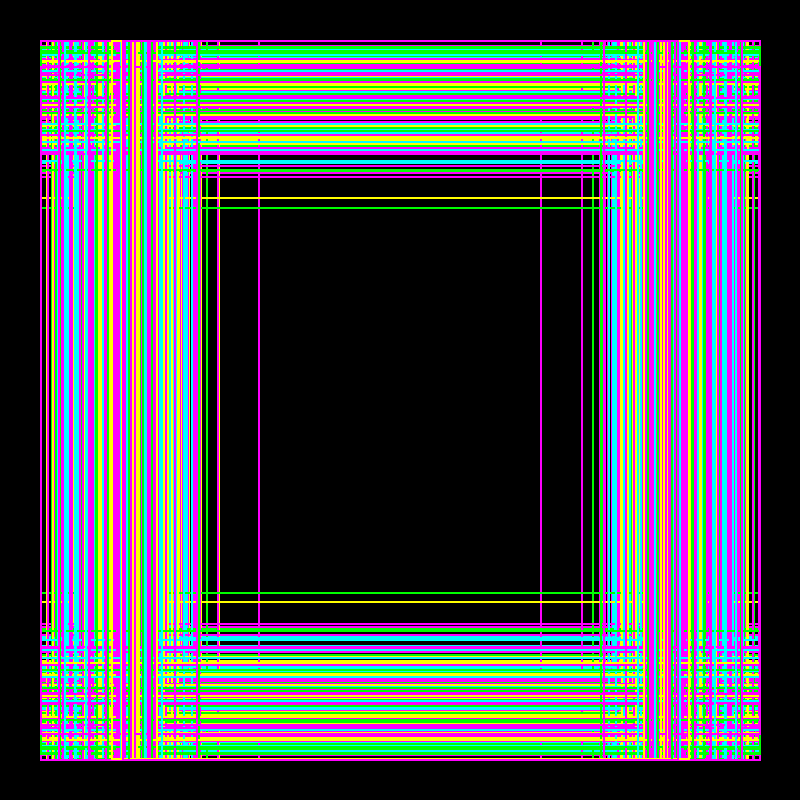

In [29]:
draw_face_bounding_boxes(bounding_boxes, canvas_size=(800, 800), output_image_path="output_image.png", box_width=2).show()

In [83]:
def plot_bounding_box_size_distribution(bounding_boxes, areas_plot_image_path="bounding_box_area_distribution.png", heights_plot_image_path="bounding_box_heights_distribution.png"):
    """
    Plot a size distribution of bounding boxes, print paths to images with significantly large bounding boxes,
    and save the plot as an image.
    
    Parameters:
    - bounding_boxes: List of tuples, where each tuple contains the image path and a list of bounding boxes (x, y, width, height).
    - areas_plot_image_path: String representing the path where the plot image will be saved.
    - heights_plot_image_path: String representing the path where the plot image will be saved.
    """
    # Path to save graphs at is a dataset directory
    graph_save_path = os.path.dirname(bounding_boxes[0][0])
    areas_plot_image_path = os.path.join(graph_save_path, areas_plot_image_path)
    
    # Initialize a list to store the areas of the bounding boxes
    areas = []

    # Initialize a list to store the areas of the bounding boxes
    heights = []

    # Iterate through the bounding boxes and calculate their areas
    for _, boxes in bounding_boxes:
        for x, y, width, height in boxes:
            area = width * height
            areas.append(area)
            heights.append(height)
            
    
    # Calculate the average bounding box area
    average_area = np.mean(areas)
    print(f"Average BBox area: {average_area}")

    # Calculate the median bounding box area
    median_area = np.median(areas)
    print(f"Median BBox area: {median_area}")

    # Calculate the average bounding box area
    average_height = np.mean(height)
    print(f"Average BBox height: {average_height}")

    # Calculate the average bounding box area
    median_height = np.median(height)
    print(f"Median BBox height: {median_height}")
    
    # Print paths to images with significantly large bounding boxes
    for image_path, boxes in bounding_boxes:
        for x, y, width, height in boxes:
            area = width * height
            if area >= 1.8 * average_area:
                print(f"Image with large bounding box: {image_path}, Area: {area}")
            if area <= 0.4 * average_area:
                print(f"Image with tiny bounding box: {image_path}, Area: {area}")
            if height >= 1.8 * average_height:
                print(f"Image with large face height: {image_path}, Height: {height}")
            if height <= 0.4 * average_height:
                print(f"Image with tiny face height: {image_path}, Height: {height}")

    # Plot the distribution
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    # ax[0].figure(figsize=(10, 6))
    ax[0].hist(areas, bins=50, edgecolor='black')
    ax[0].set_title('Bounding Box Size Distribution')
    ax[0].set_xlabel('Bounding Box Area')
    ax[0].set_ylabel('Number of Instances')
    ax[0].grid(True)

    ax[1].hist(heights, bins=50, edgecolor='black')
    ax[1].set_title('Bounding Box Height Distribution')
    ax[1].set_xlabel('Bounding Box Height')
    ax[1].set_ylabel('Number of Instances')
    ax[1].grid(True)

    # Save the plot as an image using PIL
    fig.savefig(areas_plot_image_path)
  
    # plt.show()
    
    # Close the plot to avoid display issues in some environments
    plt.close()
    
    # Open the saved plot image with PIL, convert to 'RGB' and return it
    plot_image = Image.open(areas_plot_image_path).convert('RGB')
    # plot_image.show()
    return plot_image

Average BBox area: 3720.7798165137615
Median BBox area: 3750.0
Average BBox height: 75.0
Median BBox height: 75.0
Image with tiny bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/199.jpg, Area: 1419
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/44.jpg, Area: 7566
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/45.jpg, Area: 7623
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/479.jpg, Area: 12558
Image with large face height: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/479.jpg, Height: 138
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/480.jpg, Area: 13464
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/484.jpg, Area: 6816
Image with large bounding box: /tf/data/face_videos/source_videos/dapopov/dapopov_2_frames/485.jpg, Area: 7134

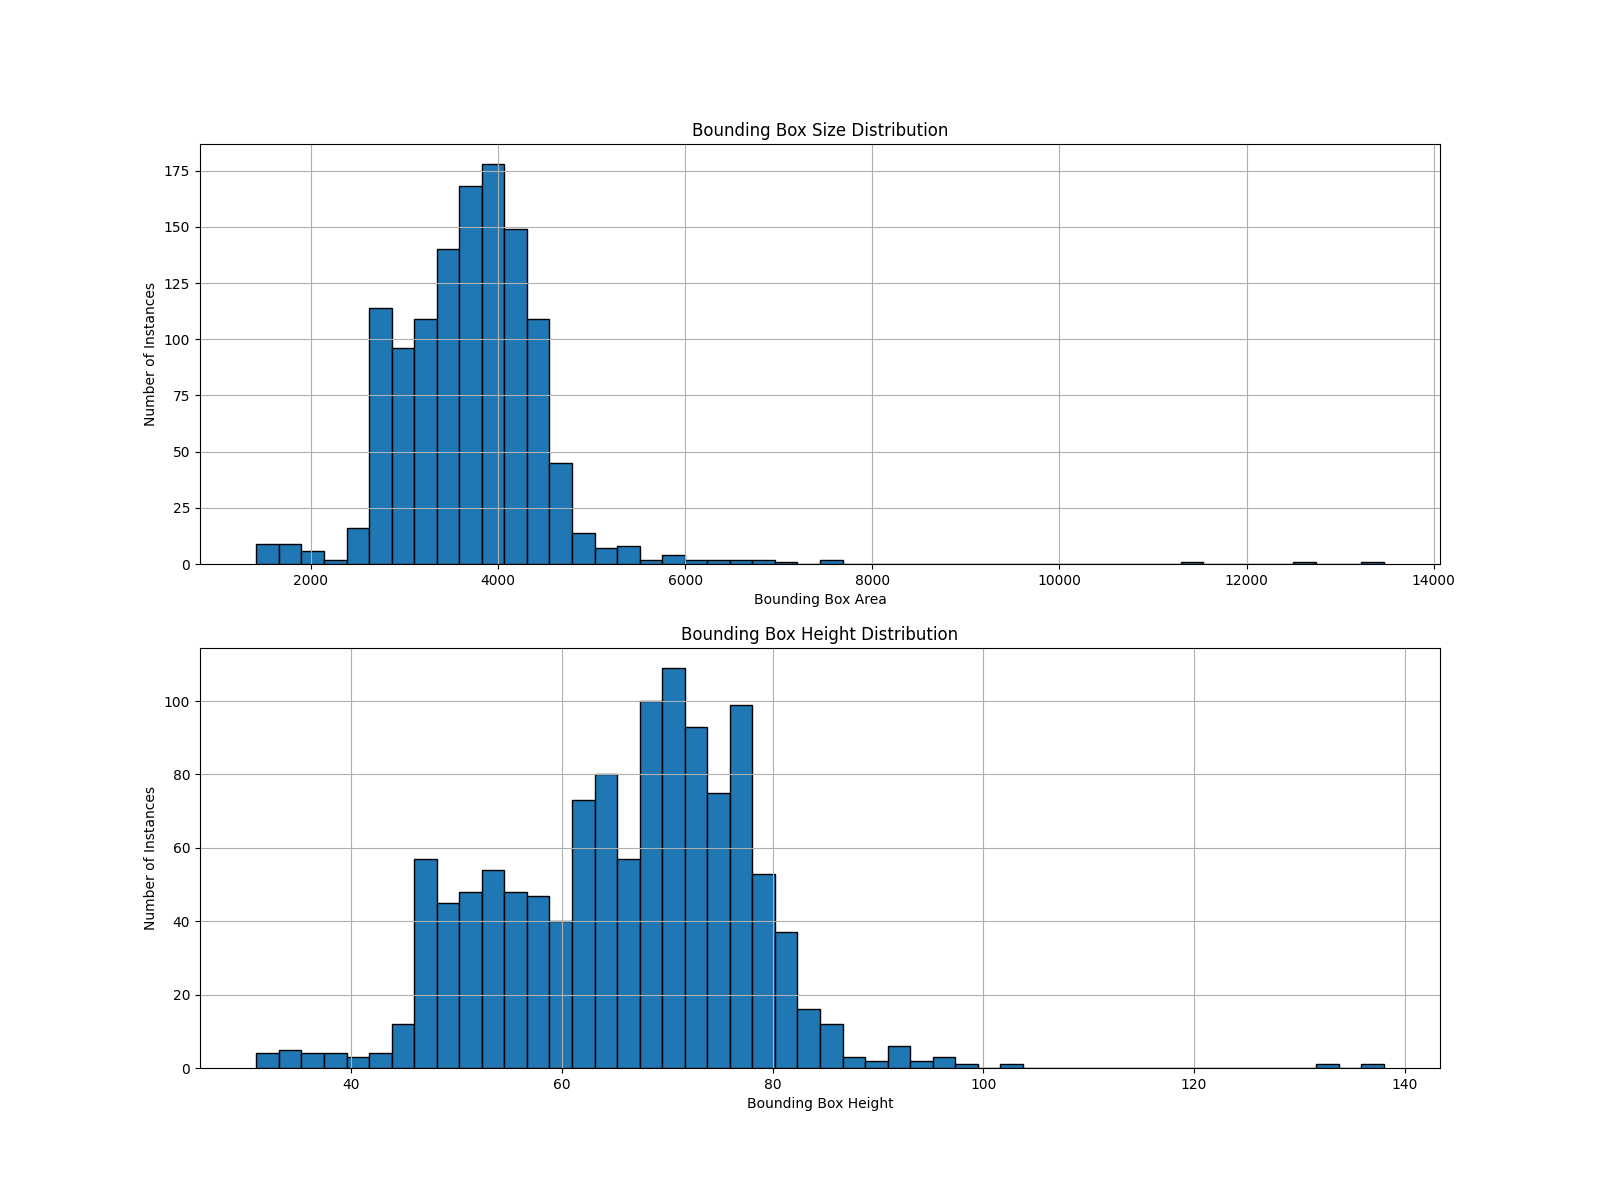

In [84]:
plot_bounding_box_size_distribution(bounding_boxes, areas_plot_image_path="bounding_box_distribution.png")

In [62]:
frames_directory_path = os.path.dirname(os.path.dirname(bounding_boxes[0][0]))
print(f"frames_dicrectory_path {frames_directory_path}")
frames_directory_name = bounding_boxes[0][0].split("/")[-2]
print(f"frames_dicrectory_name {frames_directory_name}")
os.path.join(os.path.dirname(os.path.dirname(bounding_boxes[0][0])), "bounding_box_distribution.png")

frames_dicrectory_path /tf/data/face_videos/source_videos/dapopov
frames_dicrectory_name dapopov_2_frames


'/tf/data/face_videos/source_videos/dapopov/bounding_box_distribution.png'